In [2]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from scikeras.wrappers  import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [4]:
df = df.drop(columns=['TractId', 'County', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr'])
df.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
df = pd.get_dummies(df, columns=['State'])
df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Puerto Rico,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.columns

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'State_Alabama',
       'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California',
       'State_Colorado', 'State_Connecticut', 'State_Delaware',
       'State_District of Columbia', 'State_Florida', 'State_Georgia',
       'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana',
       'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana',
       'State_Maine', 'State_Maryland', 'State_Massachusetts',
       'State_Michigan', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Neva

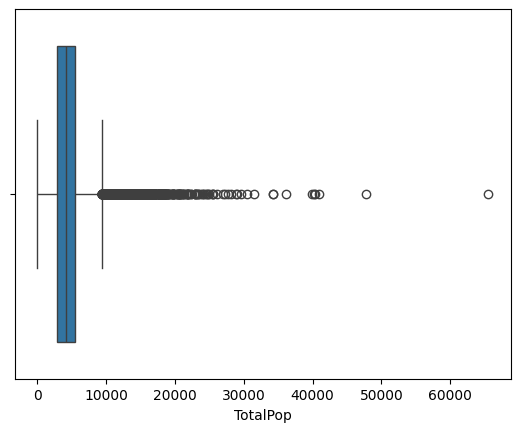

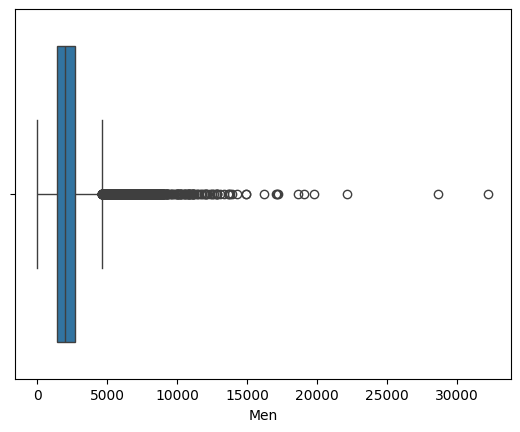

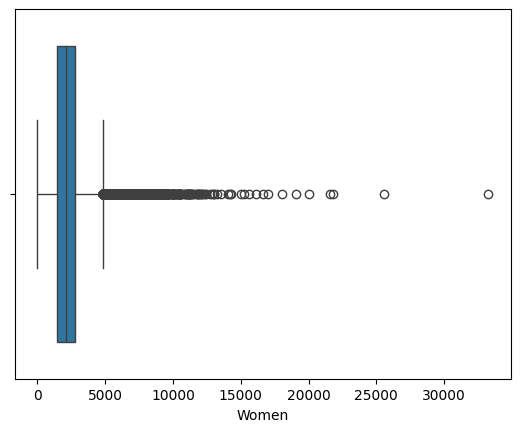

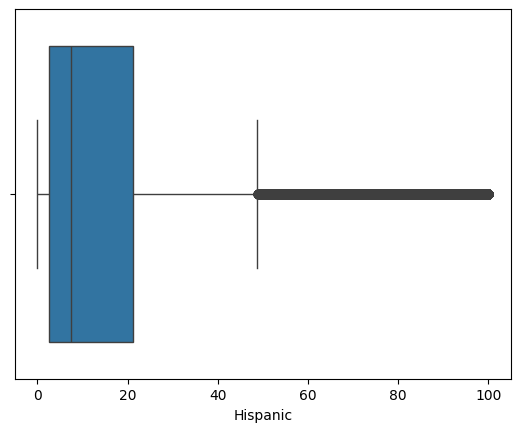

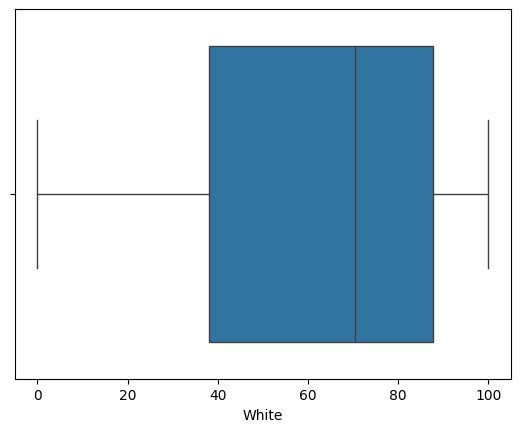

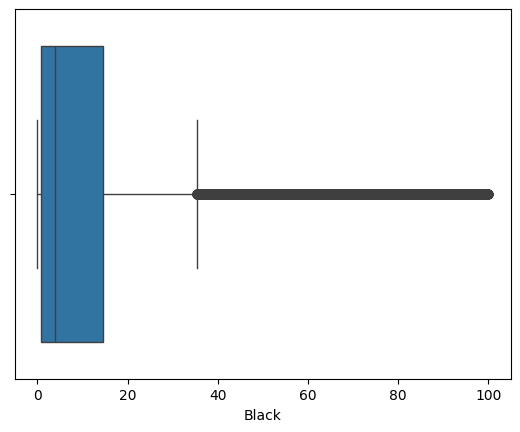

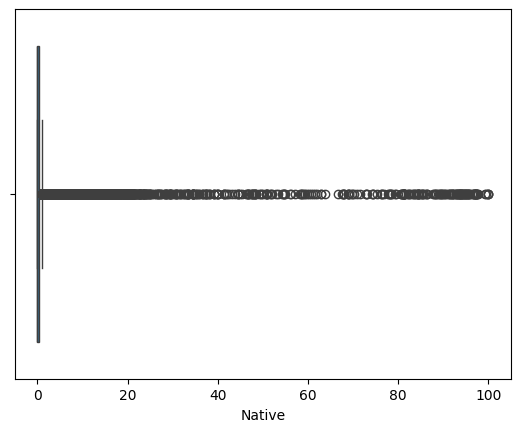

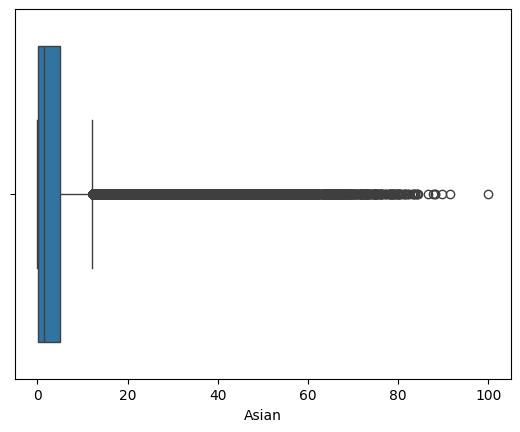

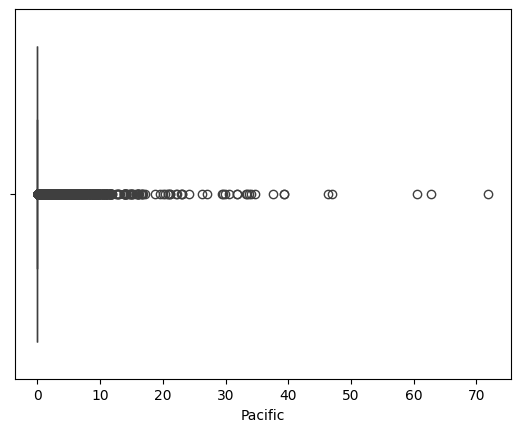

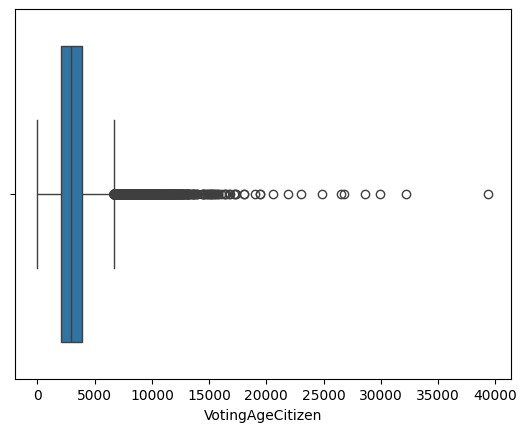

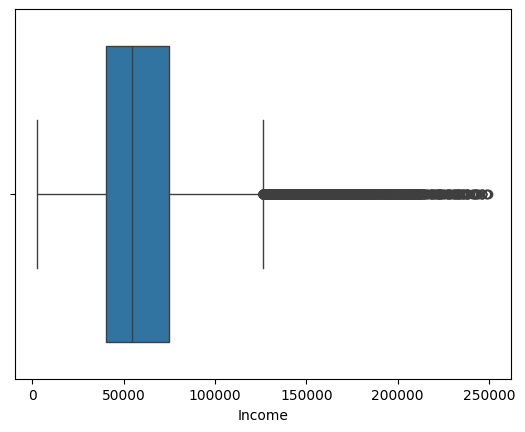

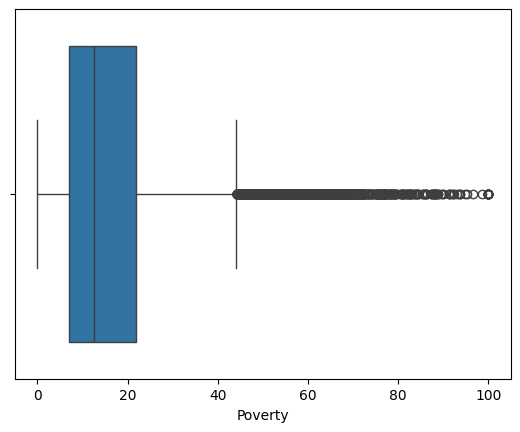

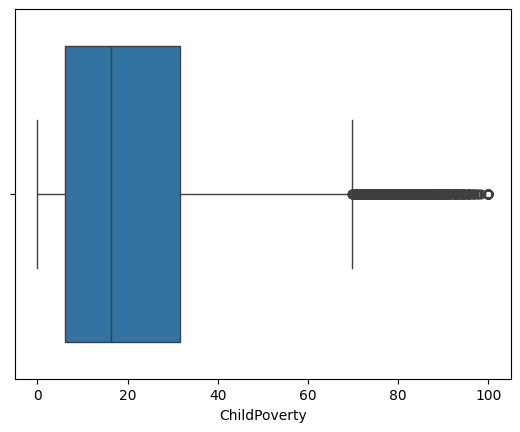

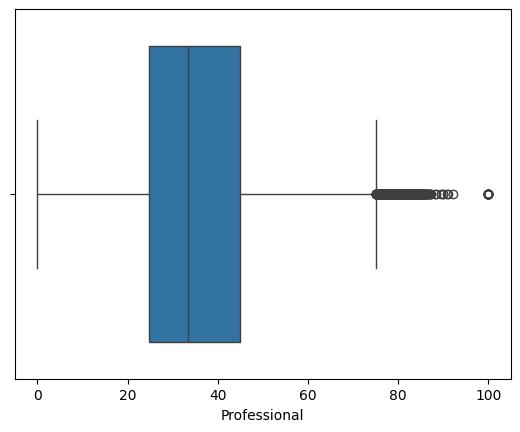

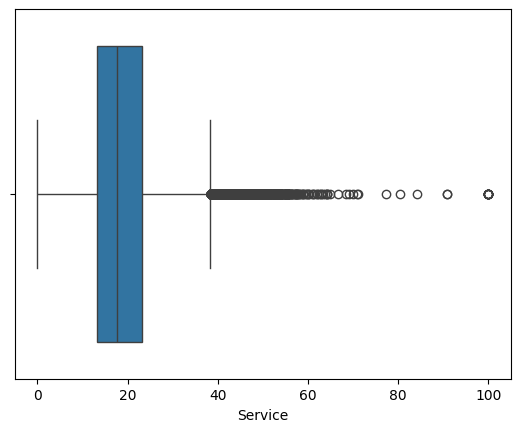

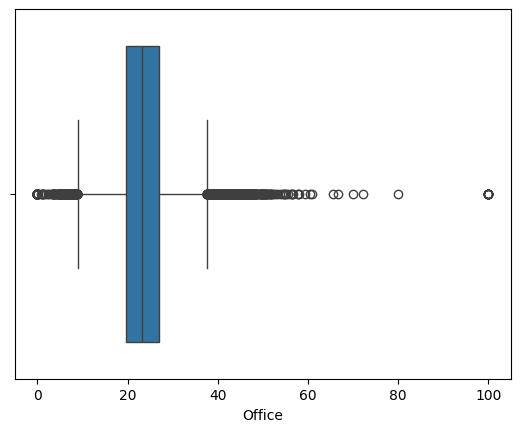

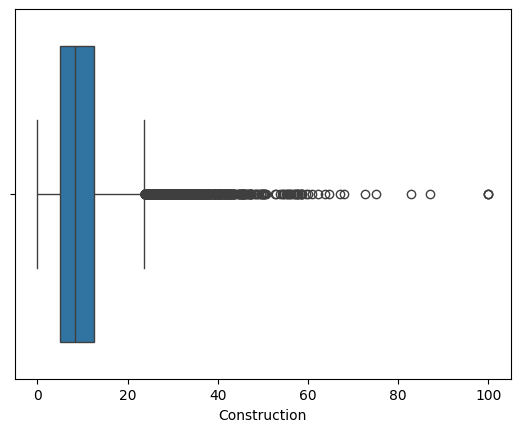

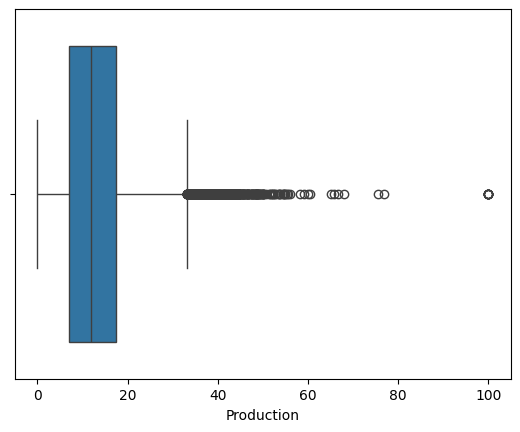

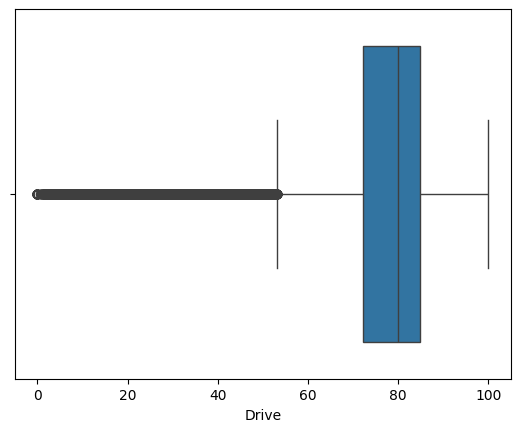

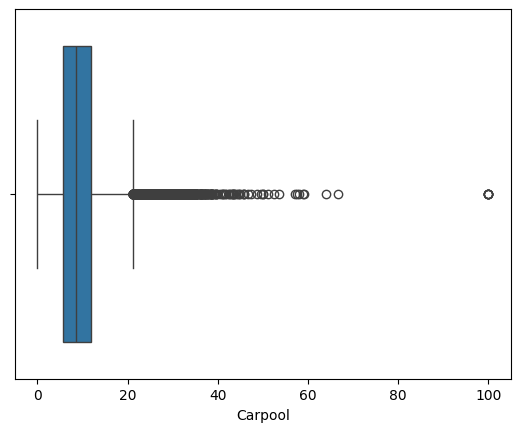

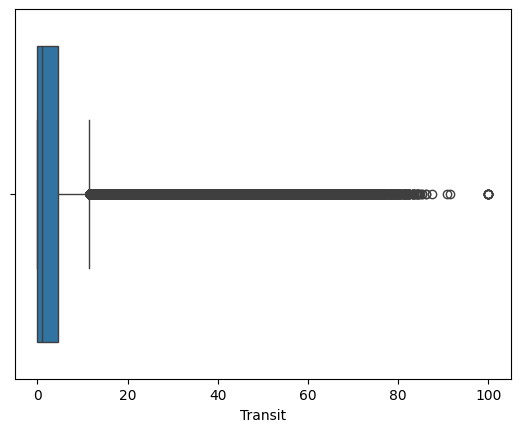

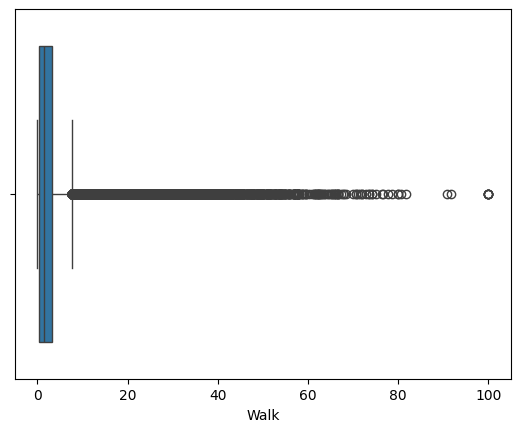

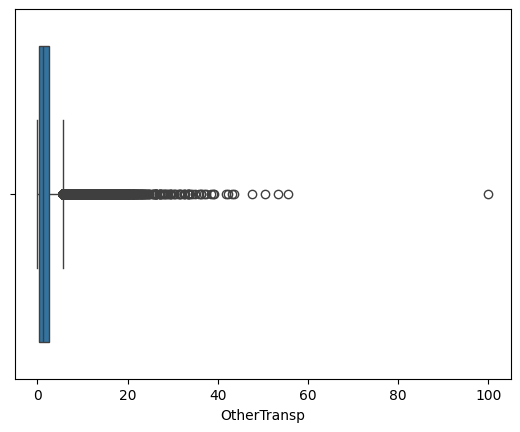

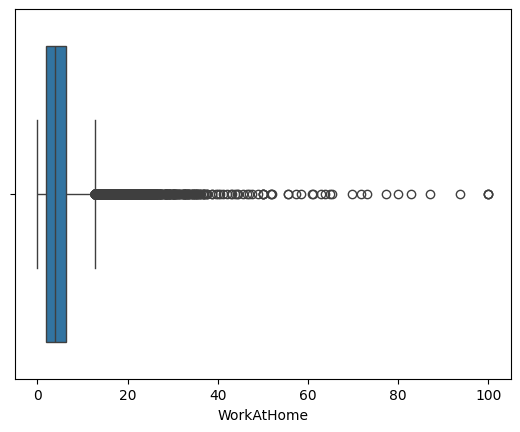

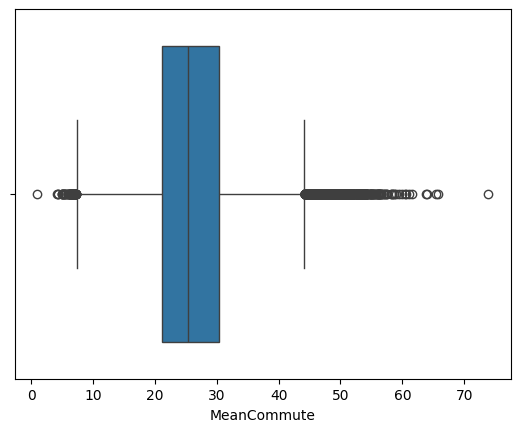

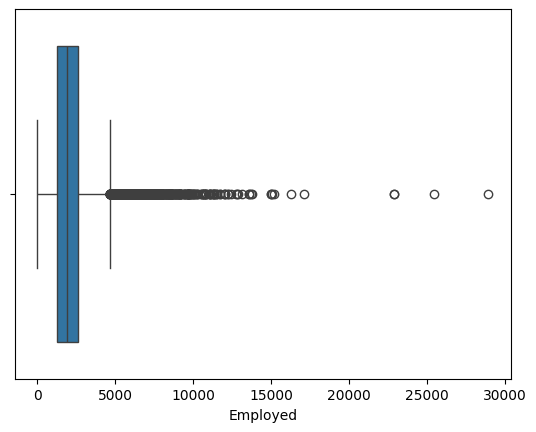

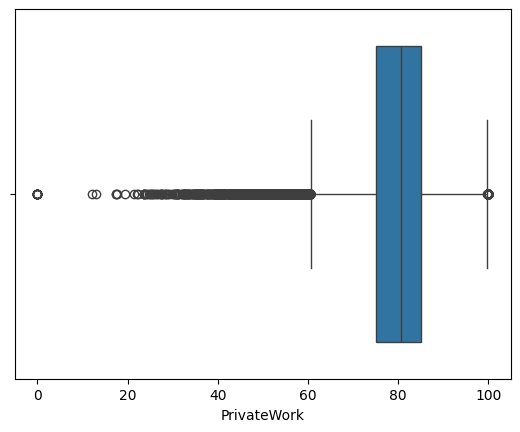

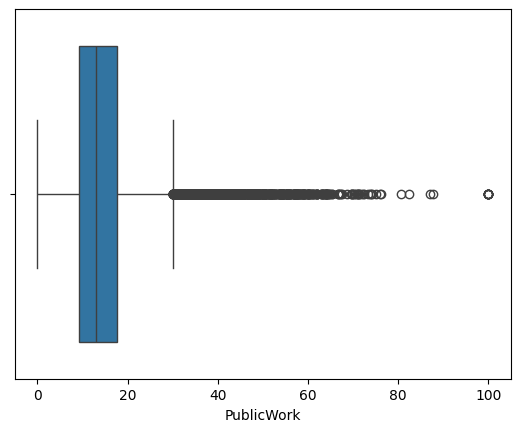

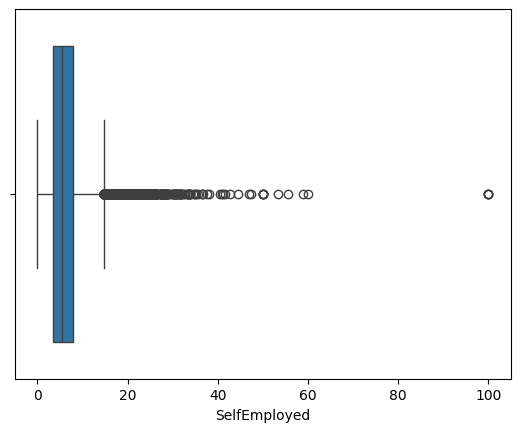

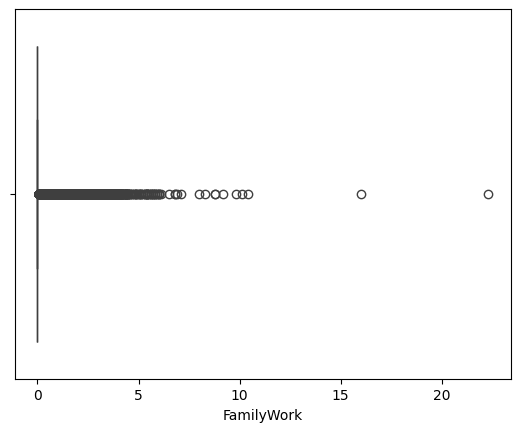

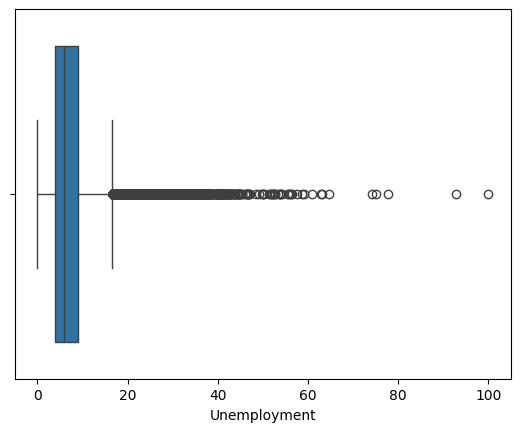

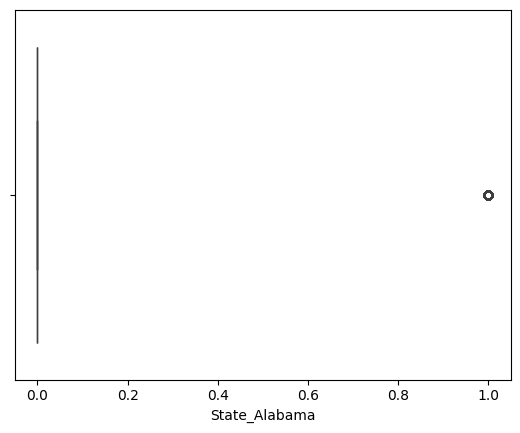

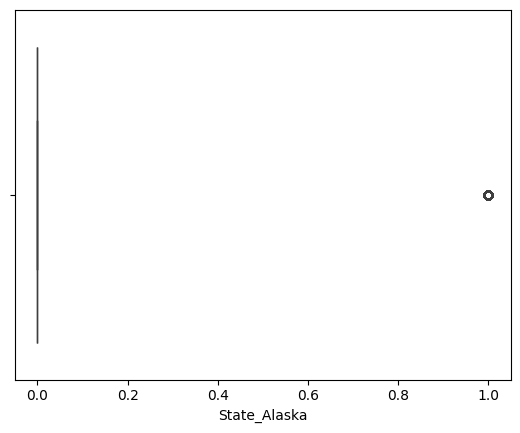

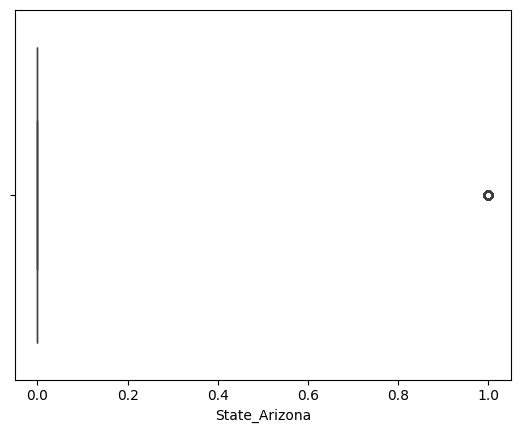

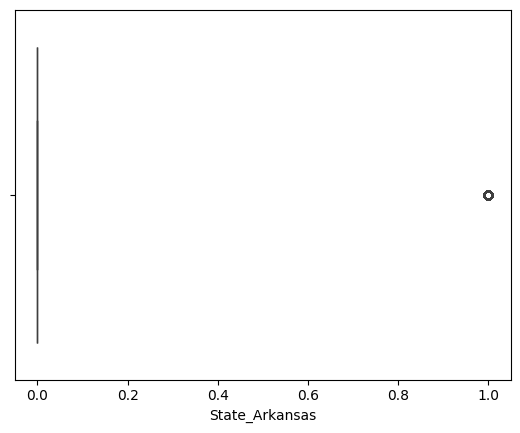

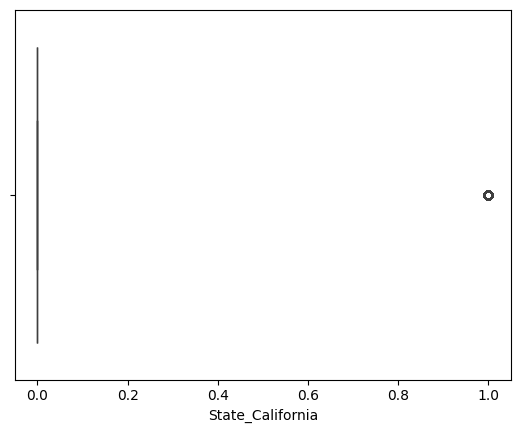

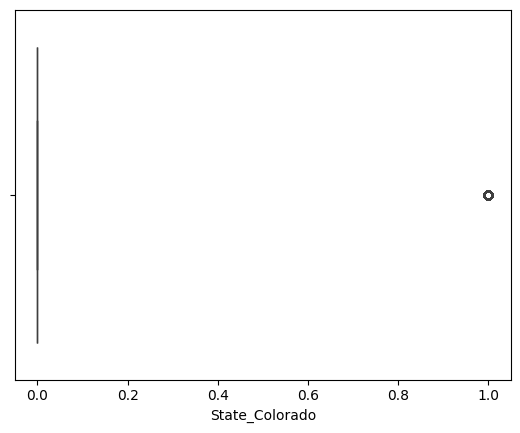

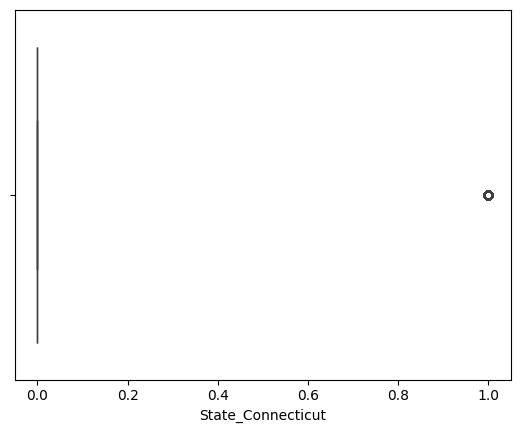

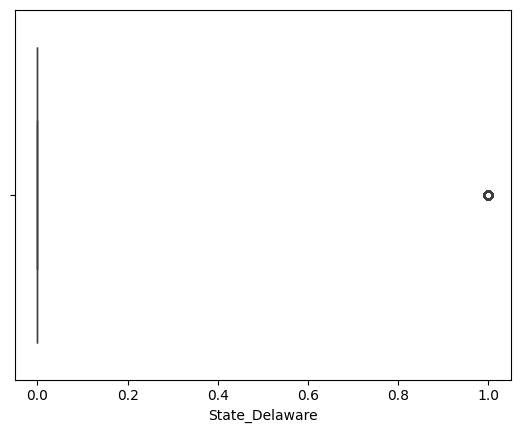

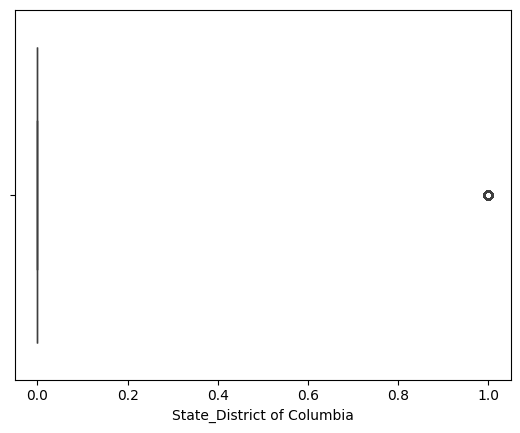

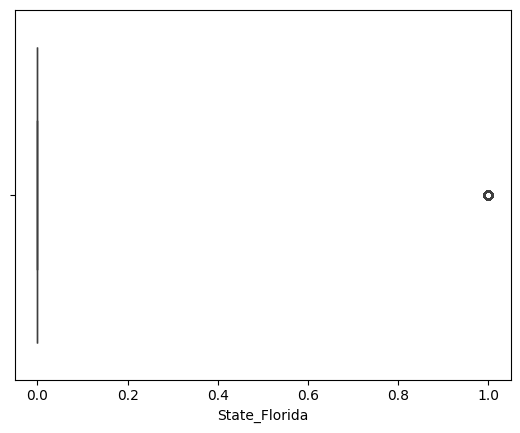

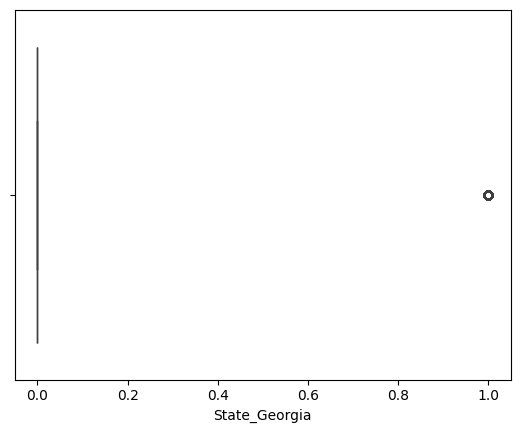

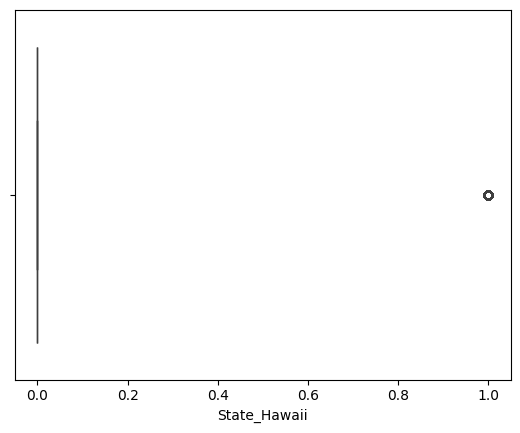

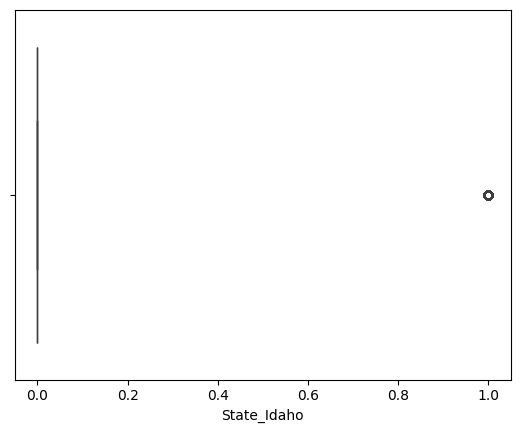

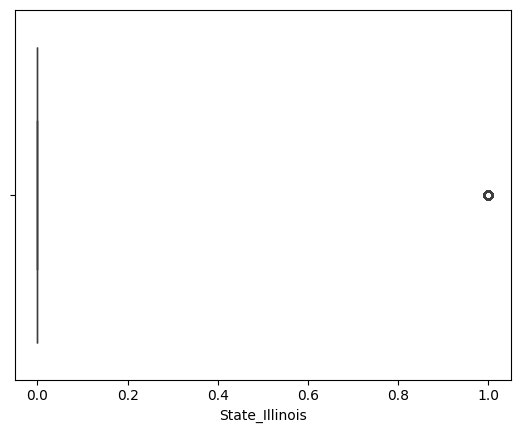

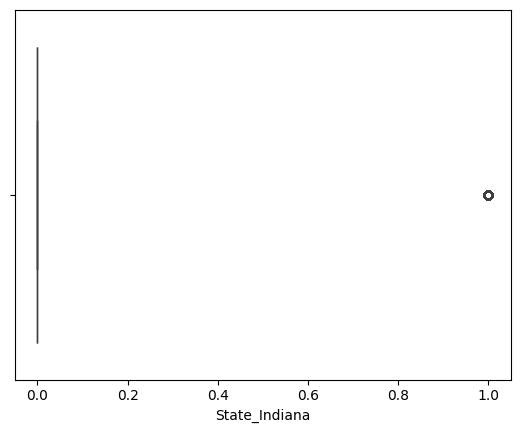

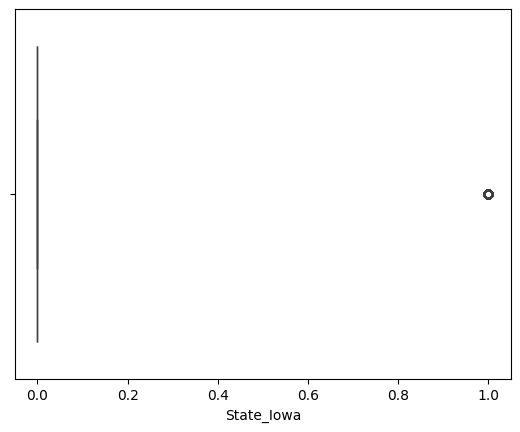

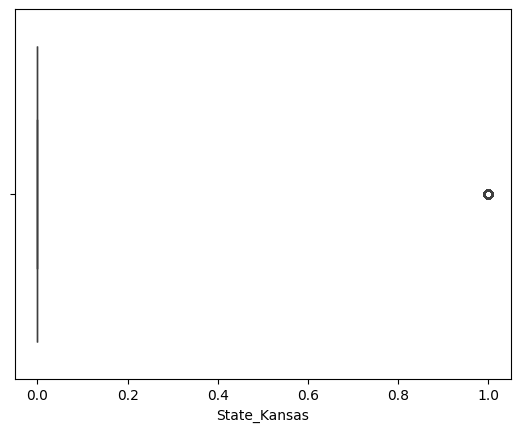

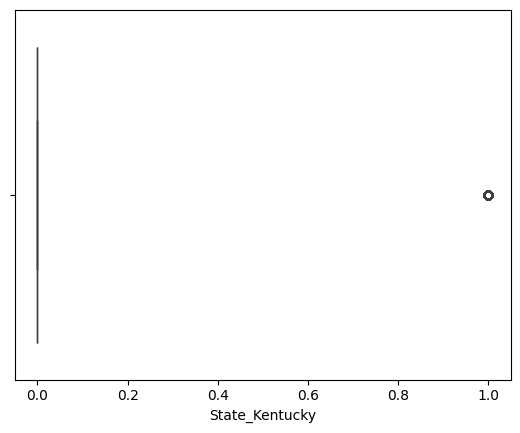

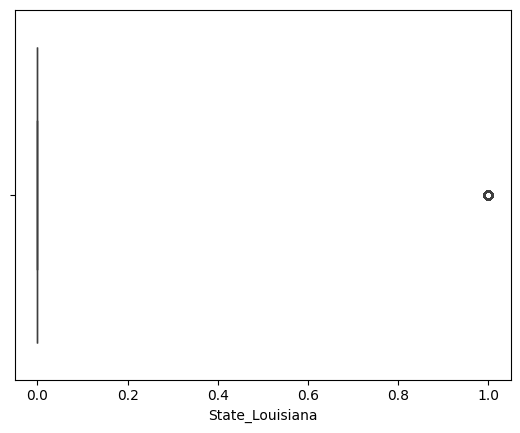

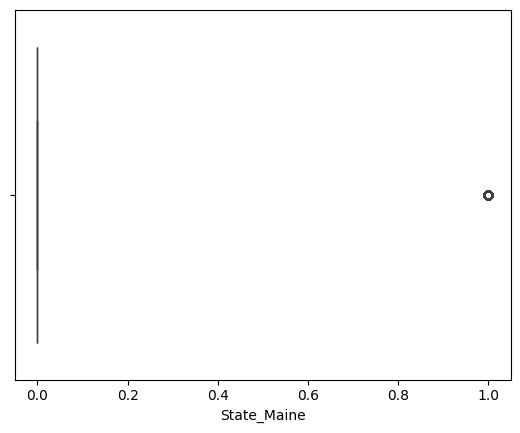

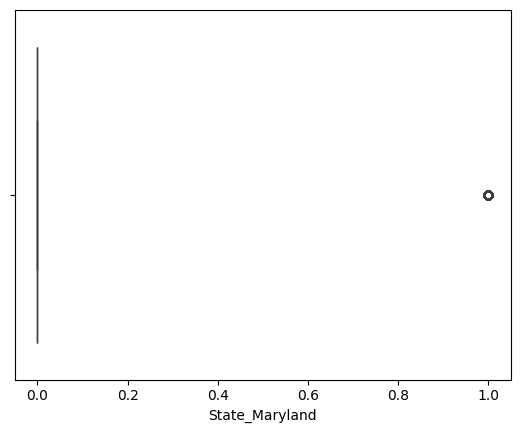

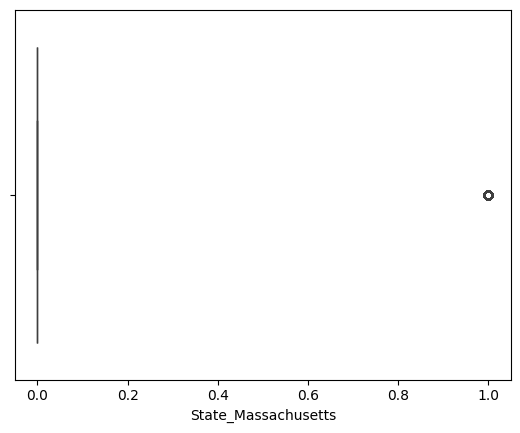

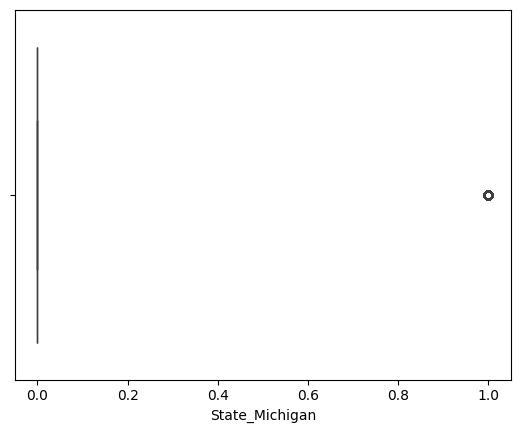

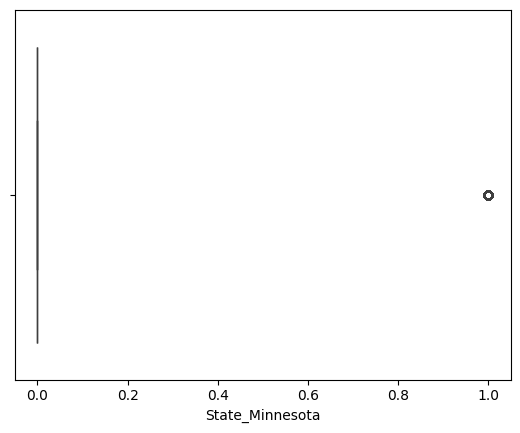

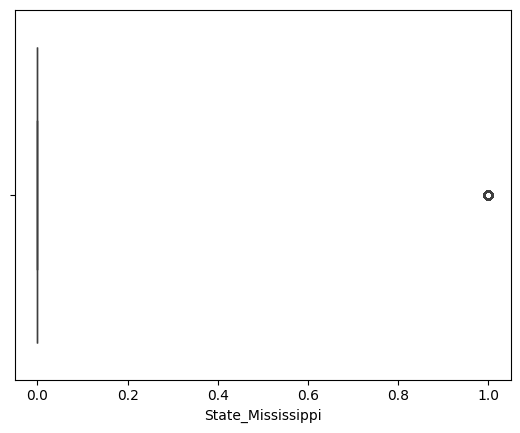

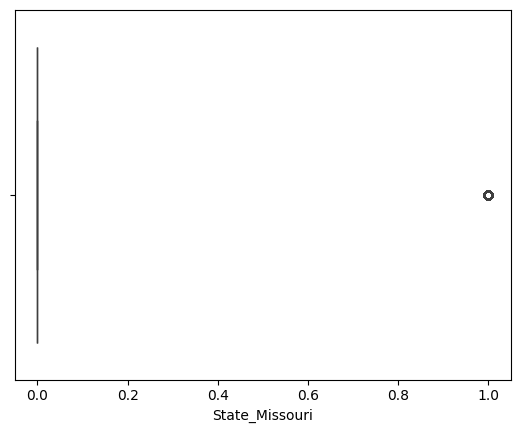

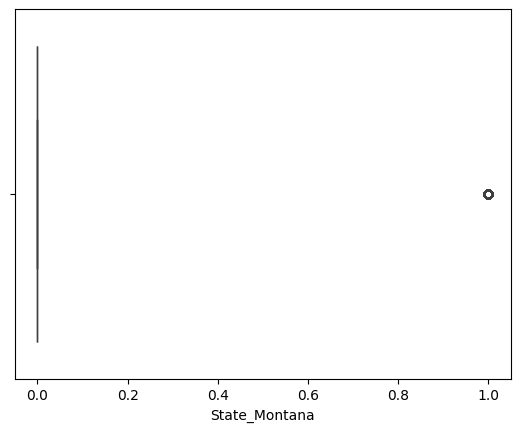

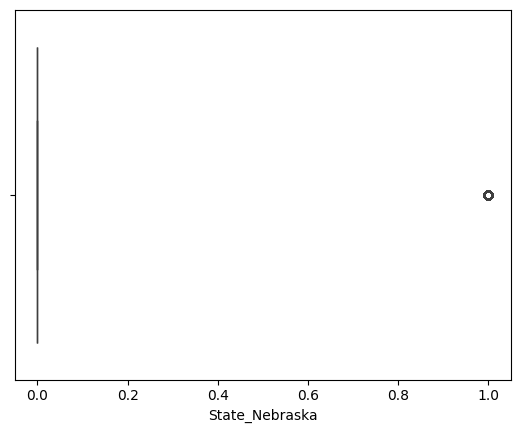

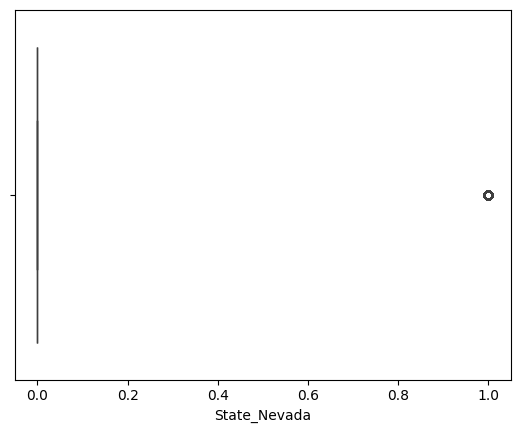

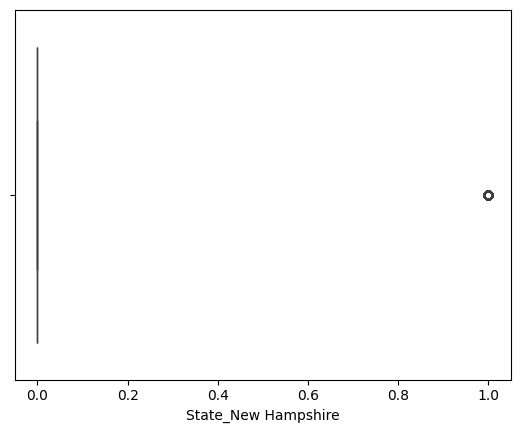

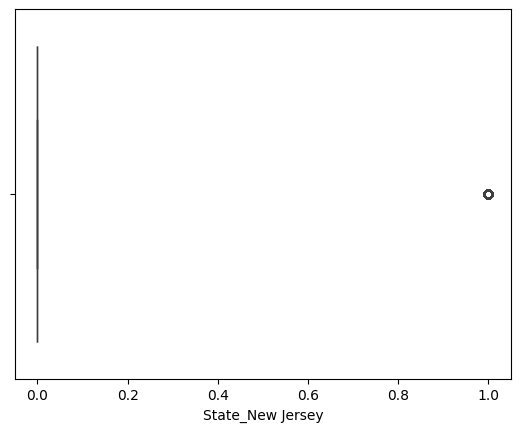

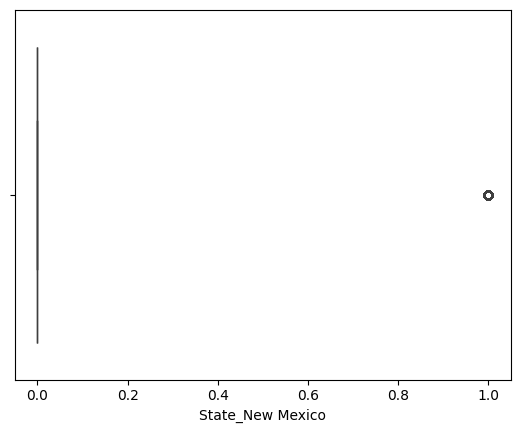

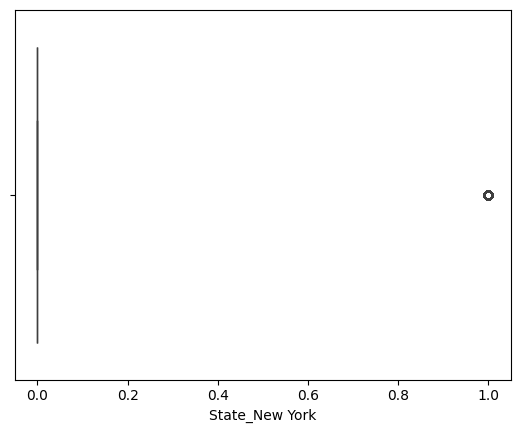

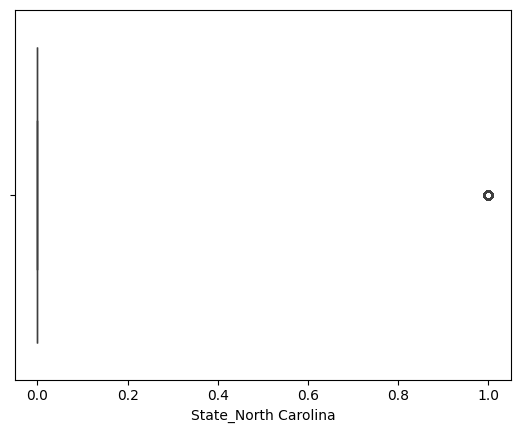

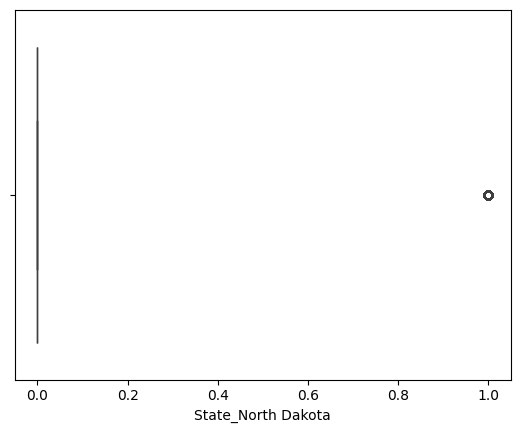

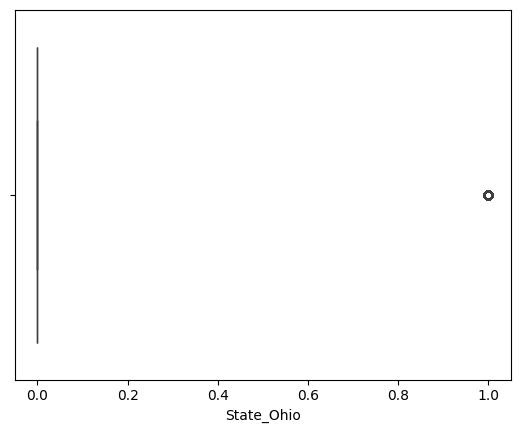

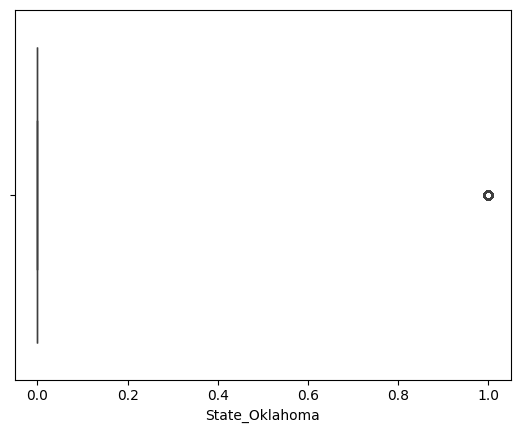

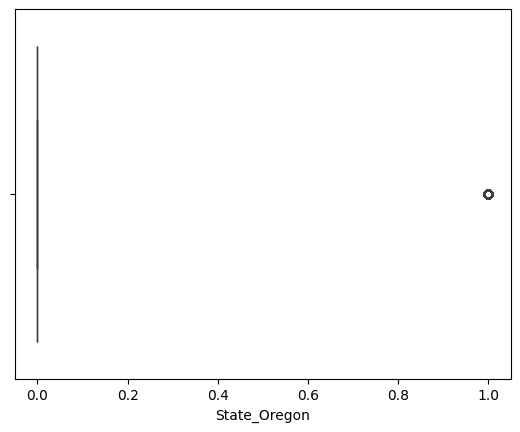

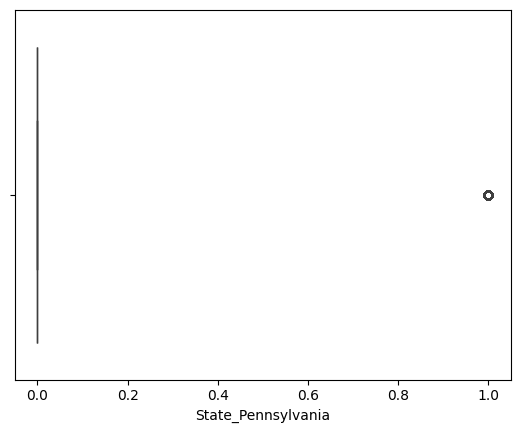

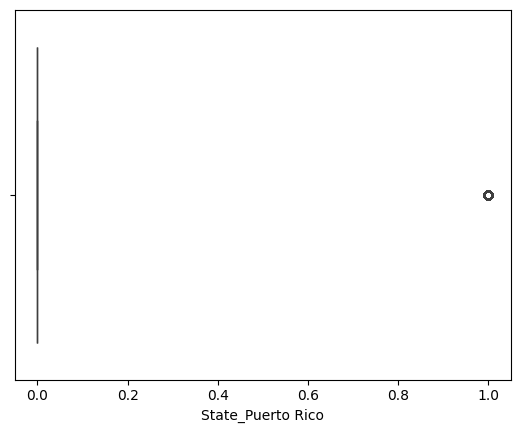

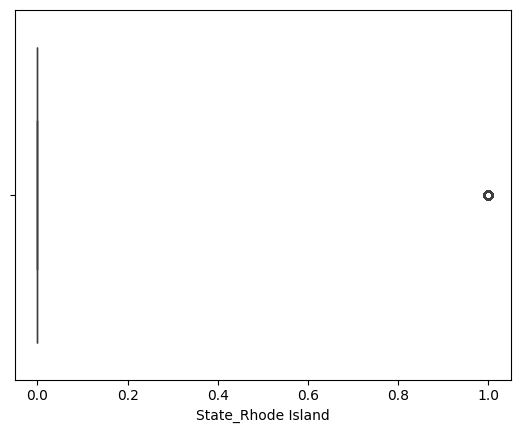

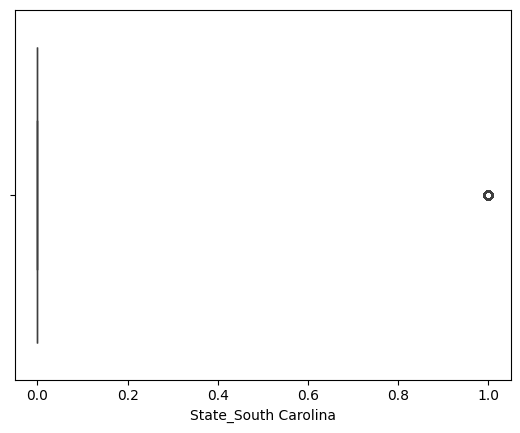

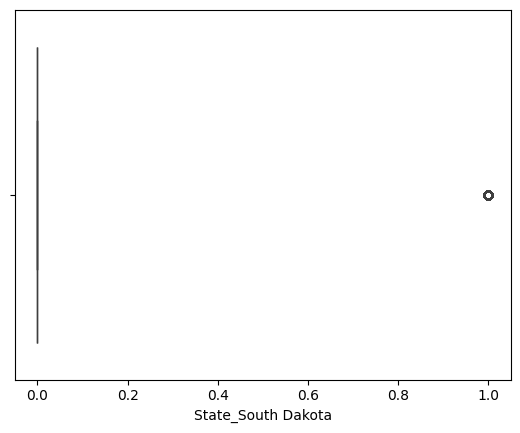

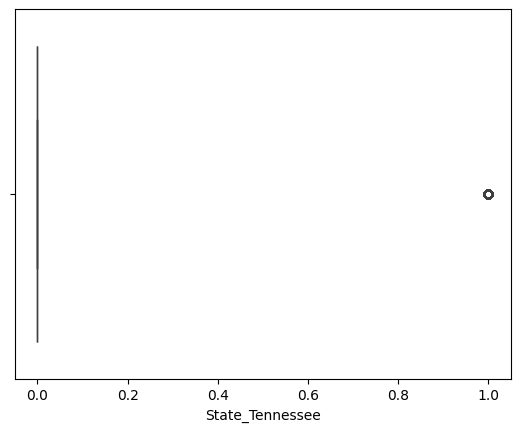

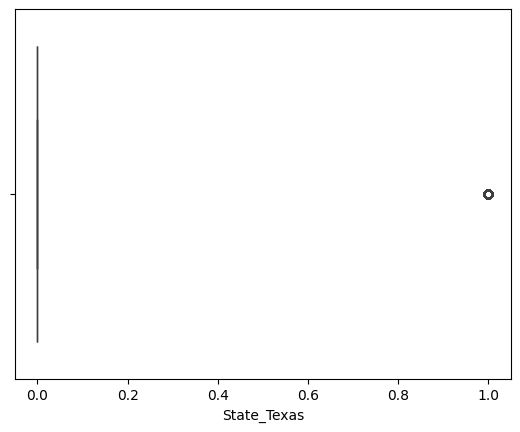

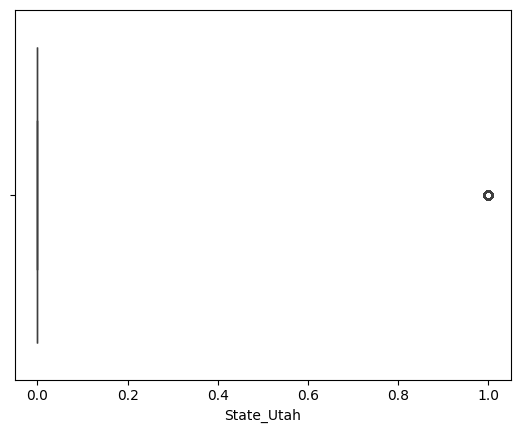

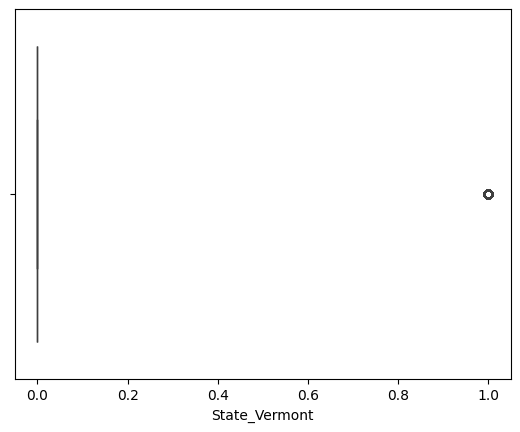

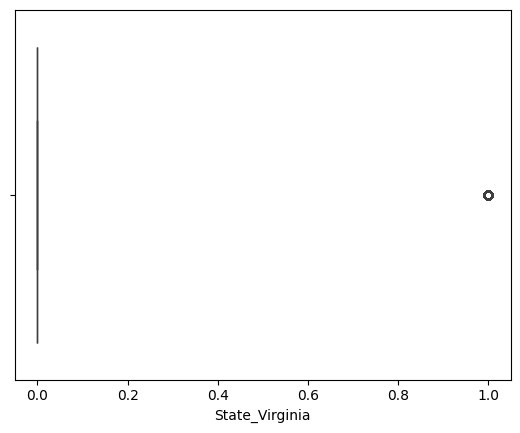

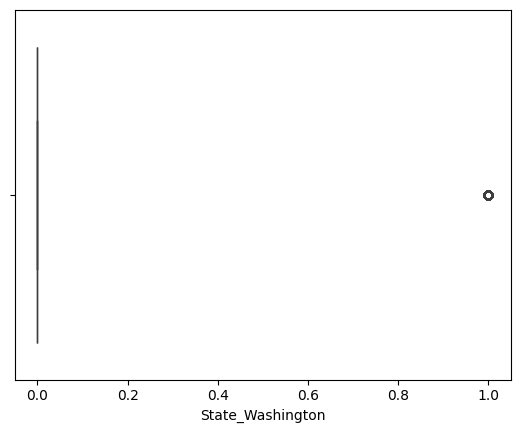

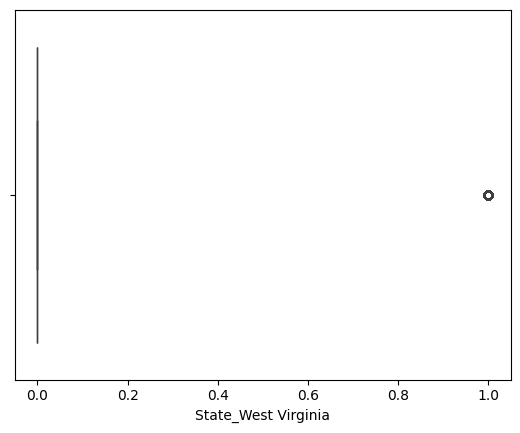

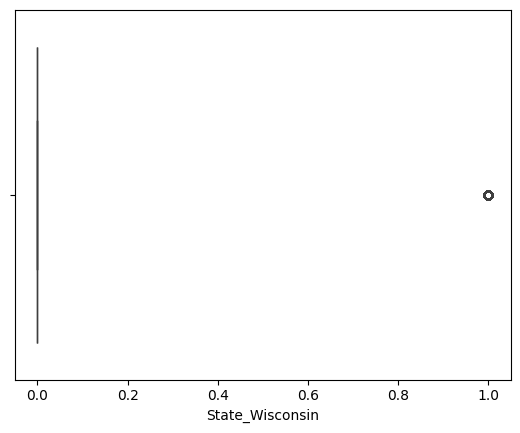

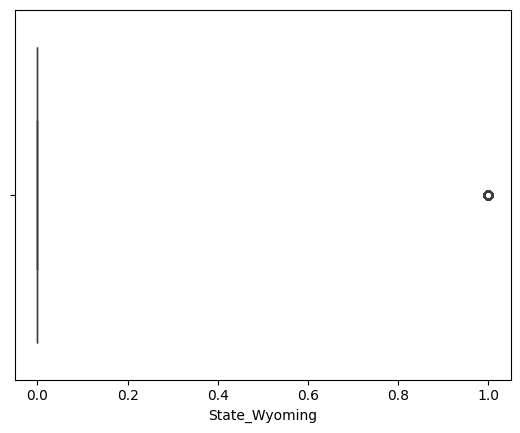

In [7]:
import seaborn as sns
for c in df.columns:
    sns.boxplot(x=df[c])
    plt.show()

In [8]:
train_cols = df.columns.values[df.columns.values != 'Income']
target = 'Income'
train_cols

array(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'State_Alabama',
       'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada'

In [9]:
df.isnull().sum()

TotalPop                         0
Men                              0
Women                            0
Hispanic                       696
White                          696
Black                          696
Native                         696
Asian                          696
Pacific                        696
VotingAgeCitizen                 0
Income                        1116
Poverty                        842
ChildPoverty                  1110
Professional                   811
Service                        811
Office                         811
Construction                   811
Production                     811
Drive                          801
Carpool                        801
Transit                        801
Walk                           801
OtherTransp                    801
WorkAtHome                     801
MeanCommute                    946
Employed                         0
PrivateWork                    811
PublicWork                     811
SelfEmployed        

In [9]:
df = df[~pd.isnull(df['Income'])]
df.shape

(72885, 83)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,QuantileTransformer

X, test, y, y_test = train_test_split(df[train_cols], df[target], test_size=.15)
X.shape

(61952, 82)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,QuantileTransformer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X  = imp_mean.fit_transform(X)
scaler = RobustScaler()
X = scaler.fit_transform(X)
test = imp_mean.transform(test)
test = scaler.transform(test)

In [12]:
def build_model():  
    model = models.Sequential()
    model.add(layers.Dense(164, activation='relu', input_shape=(len(train_cols),)))
   # model.add(layers.Dropout(0.2))
    model.add(layers.Dense(164, activation='relu'))
   # model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1)) 
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', keras.metrics.RootMeanSquaredError()])    
    return model

model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 164)               13612     
                                                                 
 dense_1 (Dense)             (None, 164)               27060     
                                                                 
 dense_2 (Dense)             (None, 1)                 165       
                                                                 
Total params: 40837 (159.52 KB)
Trainable params: 40837 (159.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from scikeras.wrappers  import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = KerasRegressor(build_fn=build_model, epochs=25, batch_size=256, verbose=1)
# evaluate using 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=255,)
results = cross_val_score(model, X, y, cv=kfold)
#model = kfold.best_estimator_
print(results)
print(results.mean())

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25


218/218 [==============================] - 5s 7ms/step - loss: 4453478912.0000 - mse: 4453478912.0000 - mae: 59466.9727 - root_mean_squared_error: 66734.3906
Epoch 2/25
218/218 [==============================] - 1s 7ms/step - loss: 2697668096.0000 - mse: 2697668096.0000 - mae: 44334.4414 - root_mean_squared_error: 51939.0820
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1371854592.0000 - mse: 1371854592.0000 - mae: 30839.1543 - root_mean_squared_error: 37038.5547
Epoch 4/25
218/218 [==============================] - 2s 7ms/step - loss: 783252224.0000 - mse: 783252224.0000 - mae: 22552.0410 - root_mean_squared_error: 27986.6445
Epoch 5/25
218/218 [==============================] - 1s 7ms/step - loss: 471733280.0000 - mse: 471733280.0000 - mae: 16813.4707 - root_mean_squared_error: 21719.4219
Epoch 6/25
218/218 [==============================] - 1s 7ms/step - loss: 344870944.0000 - mse: 344870944.0000 - mae: 14043.7188 - root_mean_squared_error: 1

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 3s 7ms/step - loss: 4424406528.0000 - mse: 4424406528.0000 - mae: 59222.6133 - root_mean_squared_error: 66516.2109
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2608659456.0000 - mse: 2608659456.0000 - mae: 43551.1172 - root_mean_squared_error: 51075.0391
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1333781888.0000 - mse: 1333781888.0000 - mae: 30353.1465 - root_mean_squared_error: 36520.9805
Epoch 4/25
218/218 [==============================] - 1s 7ms/step - loss: 763254976.0000 - mse: 763254976.0000 - mae: 22236.3340 - root_mean_squared_error: 27627.0703
Epoch 5/25
218/218 [==============================] - 2s 7ms/step - loss: 462437696.0000 - mse: 462437696.0000 - mae: 16628.9902 - root_mean_squared_error: 21504.3652
Epoch 6/25
218/218 [==============================] - 2s 7ms/step - loss: 340770976.0000 - mse: 340770976.0000 - mae: 13932.3965 - root_mean_squared_error: 184

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 4s 7ms/step - loss: 4414021120.0000 - mse: 4414021120.0000 - mae: 59193.9883 - root_mean_squared_error: 66438.1016
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2595485952.0000 - mse: 2595485952.0000 - mae: 43385.6523 - root_mean_squared_error: 50945.9102
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1319575680.0000 - mse: 1319575680.0000 - mae: 30156.4941 - root_mean_squared_error: 36325.9648
Epoch 4/25
218/218 [==============================] - 2s 8ms/step - loss: 741903808.0000 - mse: 741903808.0000 - mae: 21875.0898 - root_mean_squared_error: 27237.9121
Epoch 5/25
218/218 [==============================] - 2s 7ms/step - loss: 450894560.0000 - mse: 450894560.0000 - mae: 16403.0938 - root_mean_squared_error: 21234.2773
Epoch 6/25
218/218 [==============================] - 2s 7ms/step - loss: 335575552.0000 - mse: 335575552.0000 - mae: 13824.1162 - root_mean_squared_error: 183

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 4s 7ms/step - loss: 4451930624.0000 - mse: 4451930624.0000 - mae: 59433.9648 - root_mean_squared_error: 66722.7891
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2687716608.0000 - mse: 2687716608.0000 - mae: 44202.2695 - root_mean_squared_error: 51843.1914
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1365732736.0000 - mse: 1365732736.0000 - mae: 30703.6426 - root_mean_squared_error: 36955.8203
Epoch 4/25
218/218 [==============================] - 2s 7ms/step - loss: 771314048.0000 - mse: 771314048.0000 - mae: 22302.9414 - root_mean_squared_error: 27772.5410
Epoch 5/25
218/218 [==============================] - 2s 8ms/step - loss: 460886464.0000 - mse: 460886464.0000 - mae: 16577.0684 - root_mean_squared_error: 21468.2656
Epoch 6/25
218/218 [==============================] - 2s 8ms/step - loss: 337888512.0000 - mse: 337888512.0000 - mae: 13860.4326 - root_mean_squared_error: 183

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 4s 8ms/step - loss: 4446755328.0000 - mse: 4446755328.0000 - mae: 59455.6328 - root_mean_squared_error: 66683.9922
Epoch 2/25
218/218 [==============================] - 2s 8ms/step - loss: 2678654720.0000 - mse: 2678654720.0000 - mae: 44332.5859 - root_mean_squared_error: 51755.7227
Epoch 3/25
218/218 [==============================] - 2s 8ms/step - loss: 1384838656.0000 - mse: 1384838656.0000 - mae: 31046.1621 - root_mean_squared_error: 37213.4219
Epoch 4/25
218/218 [==============================] - 2s 7ms/step - loss: 810148672.0000 - mse: 810148672.0000 - mae: 23067.8535 - root_mean_squared_error: 28463.1113
Epoch 5/25
218/218 [==============================] - 2s 7ms/step - loss: 486009120.0000 - mse: 486009120.0000 - mae: 17176.7773 - root_mean_squared_error: 22045.6152
Epoch 6/25
218/218 [==============================] - 2s 7ms/step - loss: 348867936.0000 - mse: 348867936.0000 - mae: 14196.7734 - root_mean_squared_error: 186

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 3s 7ms/step - loss: 4448391680.0000 - mse: 4448391680.0000 - mae: 59406.9414 - root_mean_squared_error: 66696.2656
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2711059712.0000 - mse: 2711059712.0000 - mae: 44362.6797 - root_mean_squared_error: 52067.8359
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1383654272.0000 - mse: 1383654272.0000 - mae: 30902.1914 - root_mean_squared_error: 37197.5039
Epoch 4/25
218/218 [==============================] - 2s 7ms/step - loss: 786778304.0000 - mse: 786778304.0000 - mae: 22609.2734 - root_mean_squared_error: 28049.5684
Epoch 5/25
218/218 [==============================] - 2s 7ms/step - loss: 470696000.0000 - mse: 470696000.0000 - mae: 16786.3066 - root_mean_squared_error: 21695.5293
Epoch 6/25
218/218 [==============================] - 1s 7ms/step - loss: 342083040.0000 - mse: 342083040.0000 - mae: 13943.6924 - root_mean_squared_error: 184

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 4s 7ms/step - loss: 4433462784.0000 - mse: 4433462784.0000 - mae: 59295.0625 - root_mean_squared_error: 66584.2500
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2641214464.0000 - mse: 2641214464.0000 - mae: 43720.8359 - root_mean_squared_error: 51392.7461
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1366106240.0000 - mse: 1366106240.0000 - mae: 30715.3965 - root_mean_squared_error: 36960.8750
Epoch 4/25
218/218 [==============================] - 2s 7ms/step - loss: 780431168.0000 - mse: 780431168.0000 - mae: 22522.8848 - root_mean_squared_error: 27936.1973
Epoch 5/25
218/218 [==============================] - 2s 8ms/step - loss: 462027904.0000 - mse: 462027904.0000 - mae: 16626.2305 - root_mean_squared_error: 21494.8340
Epoch 6/25
218/218 [==============================] - 2s 7ms/step - loss: 335496448.0000 - mse: 335496448.0000 - mae: 13809.2490 - root_mean_squared_error: 183

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 3s 7ms/step - loss: 4415363584.0000 - mse: 4415363584.0000 - mae: 59206.7852 - root_mean_squared_error: 66448.2031
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2579168768.0000 - mse: 2579168768.0000 - mae: 43278.8477 - root_mean_squared_error: 50785.5156
Epoch 3/25
218/218 [==============================] - 2s 8ms/step - loss: 1301235328.0000 - mse: 1301235328.0000 - mae: 29954.5176 - root_mean_squared_error: 36072.6406
Epoch 4/25
218/218 [==============================] - 1s 7ms/step - loss: 732891584.0000 - mse: 732891584.0000 - mae: 21740.8809 - root_mean_squared_error: 27071.9707
Epoch 5/25
218/218 [==============================] - 1s 7ms/step - loss: 443752832.0000 - mse: 443752832.0000 - mae: 16241.6504 - root_mean_squared_error: 21065.4414
Epoch 6/25
218/218 [==============================] - 1s 7ms/step - loss: 330760672.0000 - mse: 330760672.0000 - mae: 13699.5020 - root_mean_squared_error: 181

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 3s 7ms/step - loss: 4456371712.0000 - mse: 4456371712.0000 - mae: 59506.7930 - root_mean_squared_error: 66756.0625
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2788050688.0000 - mse: 2788050688.0000 - mae: 45152.9180 - root_mean_squared_error: 52801.9961
Epoch 3/25
218/218 [==============================] - 1s 7ms/step - loss: 1453660544.0000 - mse: 1453660544.0000 - mae: 31846.6055 - root_mean_squared_error: 38126.9023
Epoch 4/25
218/218 [==============================] - 1s 7ms/step - loss: 858268480.0000 - mse: 858268480.0000 - mae: 23818.9844 - root_mean_squared_error: 29296.2188
Epoch 5/25
218/218 [==============================] - 1s 7ms/step - loss: 508735136.0000 - mse: 508735136.0000 - mae: 17549.2773 - root_mean_squared_error: 22555.1582
Epoch 6/25
218/218 [==============================] - 2s 7ms/step - loss: 356436224.0000 - mse: 356436224.0000 - mae: 14315.6875 - root_mean_squared_error: 188

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
218/218 [==============================] - 3s 7ms/step - loss: 4424262656.0000 - mse: 4424262656.0000 - mae: 59245.5469 - root_mean_squared_error: 66515.1328
Epoch 2/25
218/218 [==============================] - 2s 7ms/step - loss: 2645370112.0000 - mse: 2645370112.0000 - mae: 43915.3789 - root_mean_squared_error: 51433.1602
Epoch 3/25
218/218 [==============================] - 2s 7ms/step - loss: 1357196032.0000 - mse: 1357196032.0000 - mae: 30756.8965 - root_mean_squared_error: 36840.1406
Epoch 4/25
218/218 [==============================] - 2s 7ms/step - loss: 778970176.0000 - mse: 778970176.0000 - mae: 22585.0723 - root_mean_squared_error: 27910.0371
Epoch 5/25
218/218 [==============================] - 2s 7ms/step - loss: 463838176.0000 - mse: 463838176.0000 - mae: 16681.4785 - root_mean_squared_error: 21536.9023
Epoch 6/25
218/218 [==============================] - 2s 7ms/step - loss: 337998976.0000 - mse: 337998976.0000 - mae: 13881.4160 - root_mean_squared_error: 183

In [14]:
model = KerasRegressor(build_fn=build_model, epochs=50, batch_size=128, verbose=1)
model.fit(X, y)

C:\Users\pauls\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
484/484 [==============================] - 5s 6ms/step - loss: 3360985344.0000 - mse: 3360985344.0000 - mae: 49851.0742 - root_mean_squared_error: 57974.0039
Epoch 2/50
484/484 [==============================] - 3s 5ms/step - loss: 931375488.0000 - mse: 931375488.0000 - mae: 24528.0254 - root_mean_squared_error: 30518.4453
Epoch 3/50
484/484 [==============================] - 3s 6ms/step - loss: 372527936.0000 - mse: 372527936.0000 - mae: 14603.1641 - root_mean_squared_error: 19300.9824
Epoch 4/50
484/484 [==============================] - 3s 5ms/step - loss: 260019456.0000 - mse: 260019456.0000 - mae: 11773.7100 - root_mean_squared_error: 16125.1191
Epoch 5/50
484/484 [==============================] - 3s 6ms/step - loss: 217294176.0000 - mse: 217294176.0000 - mae: 10424.3643 - root_mean_squared_error: 14740.9014
Epoch 6/50
484/484 [==============================] - 3s 6ms/step - loss: 197105360.0000 - mse: 197105360.0000 - mae: 9728.2422 - root_mean_squared_error: 14039.42

484/484 [==============================] - 3s 6ms/step - loss: 129523672.0000 - mse: 129523672.0000 - mae: 7695.4116 - root_mean_squared_error: 11380.8467


KerasRegressor(
	model=None
	build_fn=<function build_model at 0x00000162350A4820>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
)

<img src="regressionmetrics.png" width=600 height=400 />

86/86 [==============================] - 1s 4ms/step
0.8550389701257961
86/86 [==============================] - 0s 4ms/step


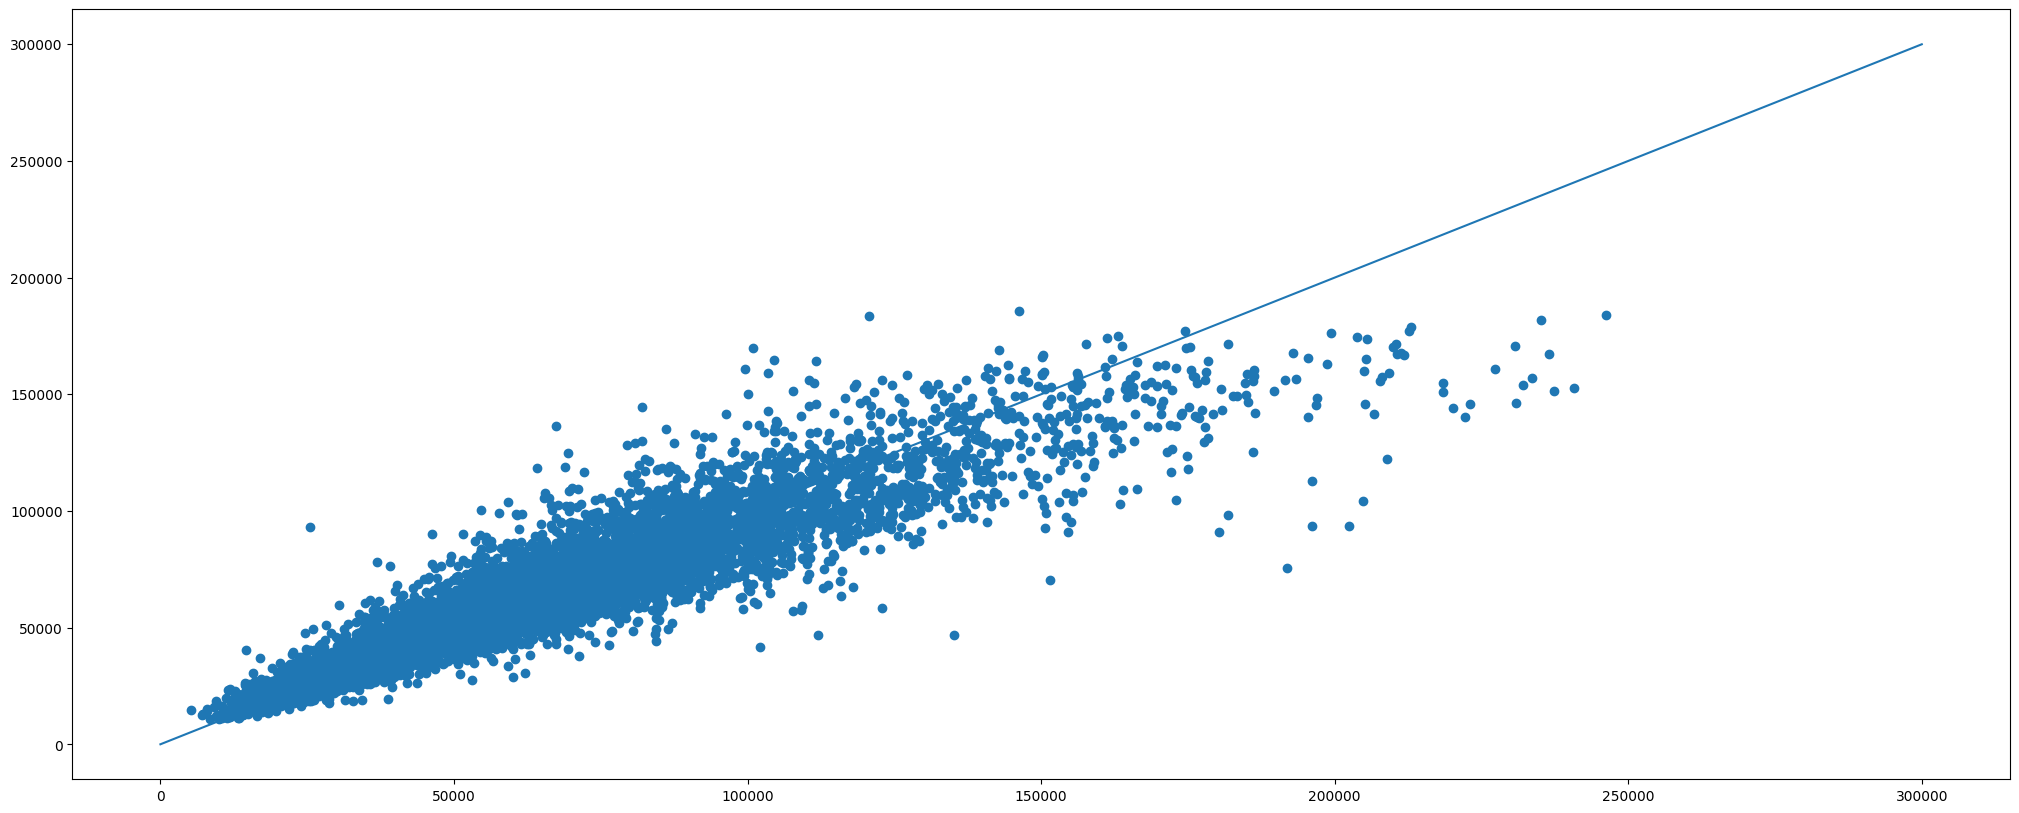

In [15]:
import matplotlib.pyplot as plt
print(model.score(test, y_test))
predictions = model.predict(test)
plt.figure(figsize=(25,10))
plt.scatter(y_test.tolist(), predictions)
plt.plot(range(300_000), range(300_000))

plt.show()

In [20]:
df['Income'].describe()

count     72885.000000
mean      61086.829265
std       30516.098180
min        2692.000000
25%       40357.000000
50%       54375.000000
75%       74659.000000
max      249750.000000
Name: Income, dtype: float64

In [16]:
import sklearn.metrics as m
def output_results():
    print('rmse', m.root_mean_squared_error(y_test, predictions))
    print('mae', m.mean_absolute_error(y_test, predictions))
    print('r2', m.r2_score(y_test, predictions))
    print('mae', m.median_absolute_error(y_test, predictions))
    
output_results()

rmse 11741.676058646017
mae 7819.707455888994
r2 0.8550389701257961
mae 5335.0859375
